# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [356]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values up to 2 decimal places

In [357]:
#Seems like a great chance to see how plotly differs from seaborn
import plotly.express as px

### Understanding the structure of the data

In [358]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/foodhub_order.csv')

In [359]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:**

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
Already I notice that some of the ratings are marked "Not Given", and I assume ratings are given on a 5 point scale?

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [360]:
#Delineate the size of the matrix.
df.shape

(1898, 9)

#### **Observations:**
There are 1898 orders spread across 9 rows of data, including order_id which has no significance.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [361]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**
The nine rows of data have no missing entries.
Integers include the order_id, customer_id, food_prep_time, and delivery_time,  all numeric.
(Are there duplicate customers?) (Can we set up categories of speed for both food prep and delivery, e.g. fast, appropriate, slow?)
Restaurant_names, and cuisine types are objects; do any overlap or are miscoded?
The cost of the order is a float, appropriately.
The day of the week and the ratings are both objects, but perhaps should be a boolean value and categories, respectively.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [362]:
#Double checking that there are no missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations:**
There does not seem to be any missing values, though some values may still be NaN or inappropriate responses. (For instance, the ratings seem to be between 3-5, and then "Not given", an issue to be addressed later.)

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [363]:
#code to give 5-number summary, transposed for easier reading
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### **Observations:**
Of the 1898 orders, the average cost is over 16 dollars, though it ranges from 4 to 35 dollars. Half of the orders are actually lower at 14 dollars.

The average time to prepare food is almost half an hour at almost 28 minutes, though it may range from 20 (minimum) to 35 minutes (maximum), a difference of only fifteen minutes.

Delivery times average 24 minutes, though it may take from 15 (minimum) to 33 minutes (maximum), once the order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [364]:
#code to count number of ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [365]:
#code to count percentage of ratings
df['rating'].value_counts(normalize=True)

Not given   0.39
5           0.31
4           0.20
3           0.10
Name: rating, dtype: float64

#### **Observations:**
Of the 1898 orders, 736 orders (39%) have ratings that are 'not given'. This is a significant portion and needs to be considered. It is interesting that the lowest rating is a 3, and this includes only 10% of the orders; can some of the 'not given' ratings reflect people who did not want to give poor ratings? Otherwise, the ratings skew high, with 31% of the orders rated as 5's, and 20% as 4's.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### Question 6: Customer ID

In [366]:
#how many unique customers are in the dataframe?
df['customer_id'].nunique()

1200

In [367]:
#which customers order repeatedly and how many times?
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [368]:
#plotly allows more exploration into exactly how many customers are ordering frequently
his=px.histogram(df, x=(df['customer_id'].value_counts()))
his.show()

**Observations:** About the Customer ID:
There are 1200 unique customers, with almost 800 placing only one order. However, there are 267 customers ordering twice, and 83 placing three orders. The four customers who order the most frequently have placed 8, 9, 10, and 13 orders.

##### Question 6: Number of restaurants and types of cuisine

In [369]:
#number of unique restaurants
df['restaurant_name'].nunique()

178

In [370]:
#number of types of cuisine
df.groupby(['cuisine_type'])['cuisine_type'].value_counts()

cuisine_type    cuisine_type  
American        American          584
Chinese         Chinese           215
French          French             18
Indian          Indian             73
Italian         Italian           298
Japanese        Japanese          470
Korean          Korean             13
Mediterranean   Mediterranean      46
Mexican         Mexican            77
Middle Eastern  Middle Eastern     49
Southern        Southern           17
Spanish         Spanish            12
Thai            Thai               19
Vietnamese      Vietnamese          7
Name: cuisine_type, dtype: int64

In [371]:
#number of types of cuisine
df.groupby(['cuisine_type'])['restaurant_name'].value_counts()

cuisine_type  restaurant_name            
American      Shake Shack                    219
              Blue Ribbon Fried Chicken       96
              Five Guys Burgers and Fries     29
              Bareburger                      27
              The Meatball Shop               20
                                            ... 
Thai          Rohm Thai                        1
              Spice Thai                       1
Vietnamese    V-Nam Cafe                       4
              Xe May Sandwich Shop             2
              Nha Trang One                    1
Name: restaurant_name, Length: 179, dtype: int64

In [372]:
his=px.histogram(df, x='cuisine_type', y= (df.groupby(['cuisine_type']).value_counts()), color='restaurant_name')
his.show()

**Observations:** About the restaurants and cuisines available: There are fourteen types of cuisine available from 178 different restaurants. The most popular restaurants serve American (more than 575 orders), Japanese (more than 450 orders) and Italian (almost 300 orders). Chinese comes in fourth with over 200 orders and no other cuisine gets more than 80 orders.

##### Question 6: Cost of the Order

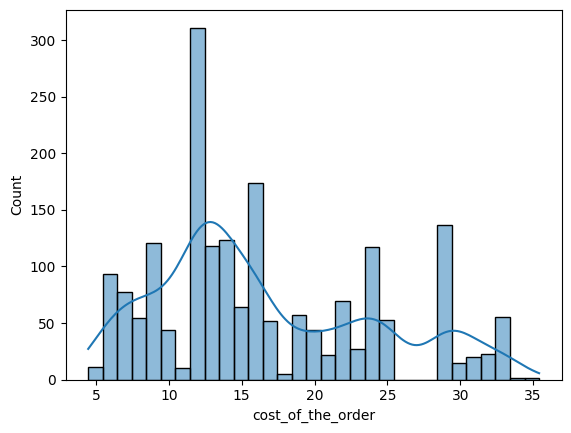

In [373]:
#distribution of the number of orders and the general cost of the order
sns.histplot(data=df, x='cost_of_the_order',binwidth=1,kde=True);

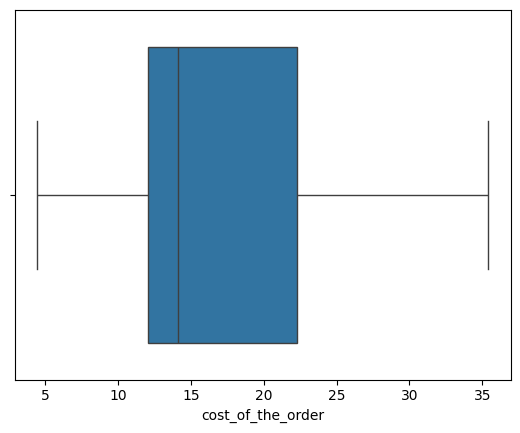

In [374]:
#establish the quartiles and outliers for money spent per order
sns.boxplot(data=df, x='cost_of_the_order');

**Observations:** About the cost of the order:
More than 300 orders are around twelve dollars, with 50% of the orders ranging between 12 and 23 dollars. Interestingly, there seem to be few orders between 26 and 29 dollars, and no orders less than 4, or more than 35 dollars.

##### Question 6: Food Preparation Time

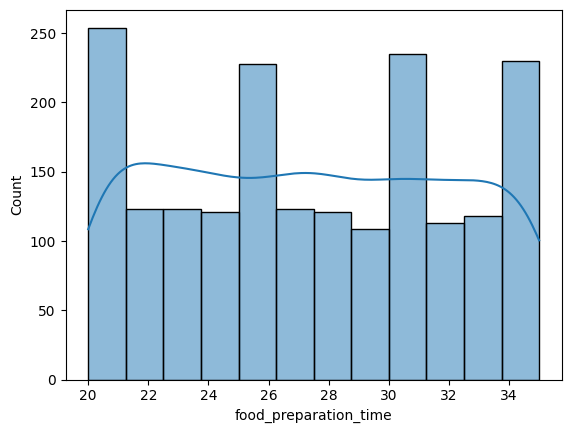

In [375]:
#distribution of the number of orders and how long each order took
sns.histplot(data=df, x='food_preparation_time',kde=True);

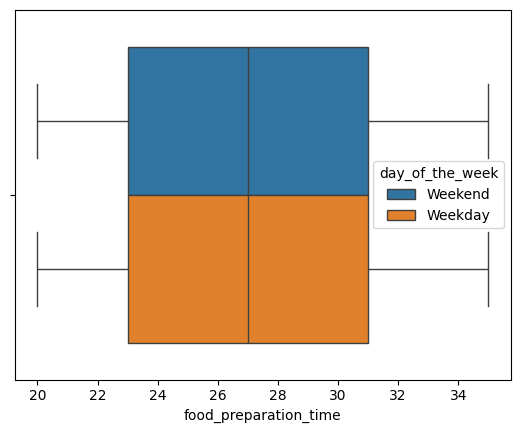

In [376]:
#establish the quartiles and outliers for length of time to prepare each order
sns.boxplot(data=df, x='food_preparation_time', hue='day_of_the_week');

**Observations:** About the food preparation time:
In general, 50% of the food orders take between 23 and 31 minutes. The graph is almost evenly skewed, with the median right at 27 minutes.
Interestingly, the histogram shows four spikes, at 20, 26, 30 and 34 minutes, with the remaining times evenly split at around 110 orders apiece. Perhaps those four time intervals relate to specific food cooking times (e.g. chicken must be cooked x number of minutes?)

##### Question 6: Food Delivery Time

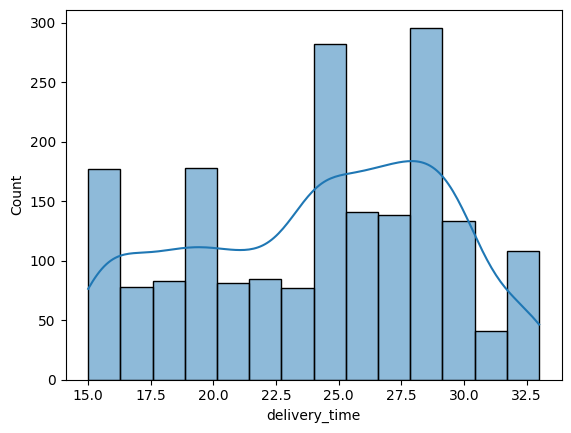

In [377]:
#distribution of the number of orders and the general time for each delivery
sns.histplot(data=df, x='delivery_time',kde=True);

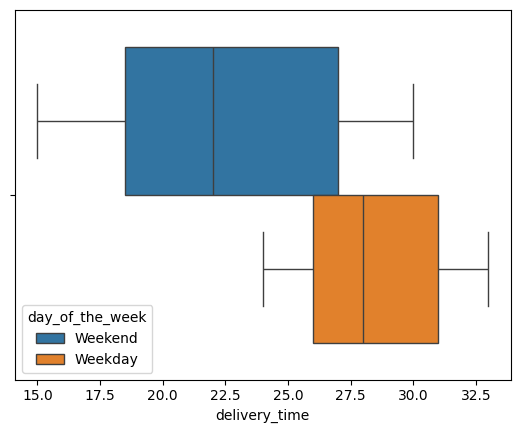

In [378]:
#establish the quartiles and outliers for length of time to deliver each order
sns.boxplot(data=df, x='delivery_time', hue='day_of_the_week');

**Observations:** About the food delivery time:
The data is slightly left skewed, with two modes of almost three hundred orders each taking 25 and 28 minutes. The median length of time for an order was 25 minutes, and the most time for delivery was almost 33 minutes, while the minimum was 15 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [379]:
# look at relationship between restaurants and number of orders
df['restaurant_name'].value_counts().head(25)

Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Rubirosa                                  37
Sushi of Gari 46                          37
Momoya                                    30
Five Guys Burgers and Fries               29
Blue Ribbon Sushi Izakaya                 29
Bareburger                                27
Tamarind TriBeCa                          27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
The Smile                                 18
ilili Rest

In [380]:
#explore the connection between cuisines, number of orders, and the individual restaurants
his=px.histogram(df, x='restaurant_name', y= (df.groupby(['restaurant_name']).value_counts()), color='cuisine_type')
his.update_yaxes(title_text="Number of orders")
his.show()

**Observations:** About the top five restaurants:
The top five restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Of the 178 restaurants, the top 18 account for 60% of orders; the remaining 160 restaurants vie for remaining orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [381]:
#number of orders and cuisine_type by day of the week
his=px.histogram(df, x='cuisine_type', y= (df.groupby(['restaurant_name']).value_counts()), color='day_of_the_week')
his.update_yaxes(title_text="Number of orders")
his.show()

In [383]:
#sorting number of orders by day of the week, then type of cuisine
popular_cuisine=df.groupby(['day_of_the_week'])['cuisine_type'].value_counts(ascending=False)
popular_cuisine

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

**Observations:** About the most popular cuisine on weekends:
The most popular cuisines are American and Japanese, followed by Italian and Chinese. (Interesting side note: on weekends, Mexican food edges out Indian by a mere four orders.)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

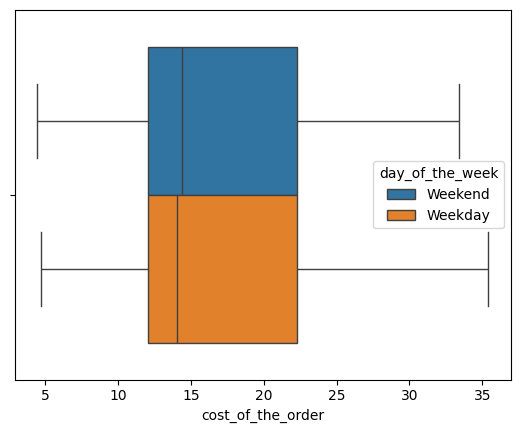

In [384]:
#Using a boxplot to explore the breakdown of costs
sns.boxplot(data=df,x='cost_of_the_order', hue='day_of_the_week');

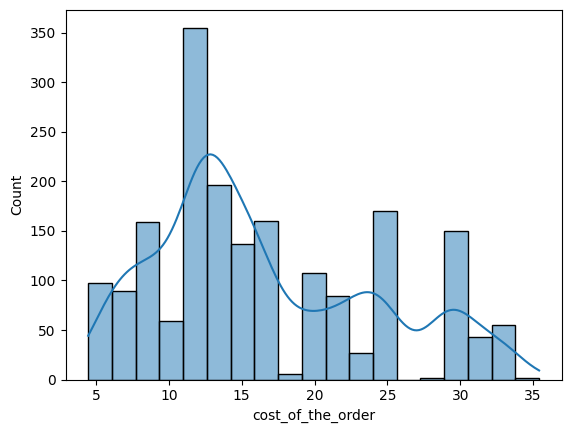

In [385]:
#using a histogram to look at the breakdown of costs
sns.histplot(data=df, x="cost_of_the_order", kde=True);


In [46]:
#number of orders over $20 divided by total number of orders to get percentage
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]

0.2924130663856691

**Observations:** About orders placed over 20 dollars: 29% of the orders are for values over 20 dollars with the high end over 35 dollars.




### **Question 10**: What is the mean order delivery time? [1 mark]

In [386]:
#the mean, or average delivery time
print(f'The average delivery time is',round(df['delivery_time'].mean()),'minutes.')

The average delivery time is 24 minutes.


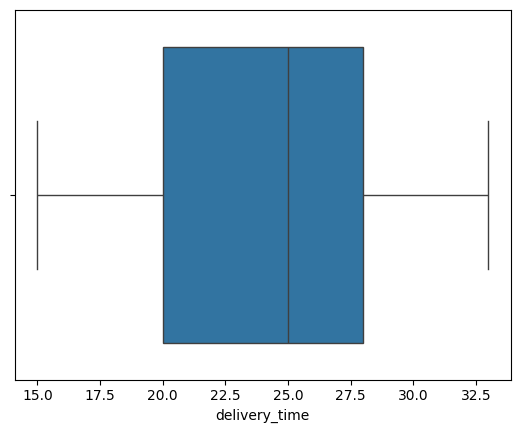

In [387]:
#In a normal distribution, the median is usually close to the mean; the median here is 25 minutes.
sns.boxplot(data=df, x='delivery_time');

**Observations: ** About the mean delivery time: The average delivery time is 24 minutes. The fastest delivery time was 15 minutes; the longest was 33 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [388]:
cust_freq = df['customer_id'].value_counts(ascending=False)
print(cust_freq.head(20))

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
Name: customer_id, dtype: int64


**Observations:** The top four customers are #52832, #47440, #83287, and customer #250494 . The top twenty customers have all placed at least five orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [389]:
#I added column for numerical rating (a rewrite of rating which is currently an object)
#(walk through in questions 13 & 15)
#First I changed the rating 'Not given' to NaN, then marked the numerical rating as a float
#This way I can look at correlation including ratings.
df['num_rating']=df['rating']
df['num_rating'].replace(['Not given'],np.nan,inplace=True)
df['num_rating']=df['num_rating'].astype(float)

#I did the same for day of the week.
df['num_day']=df['day_of_the_week']
df['num_day'].replace(['Weekend'],1,inplace=True)
df['num_day'].replace(['Weekday'],0,inplace=True)
df['num_day']=df['num_day'].astype(int)

#added a column combining food preparation time and delivery time
df['total_time']=df['food_preparation_time']+df['delivery_time']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   num_rating             1162 non-null   float64
 10  num_day                1898 non-null   int64  
 11  total_time             1898 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 178.1+ KB


<ipython-input-390-22ce5503cb71>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



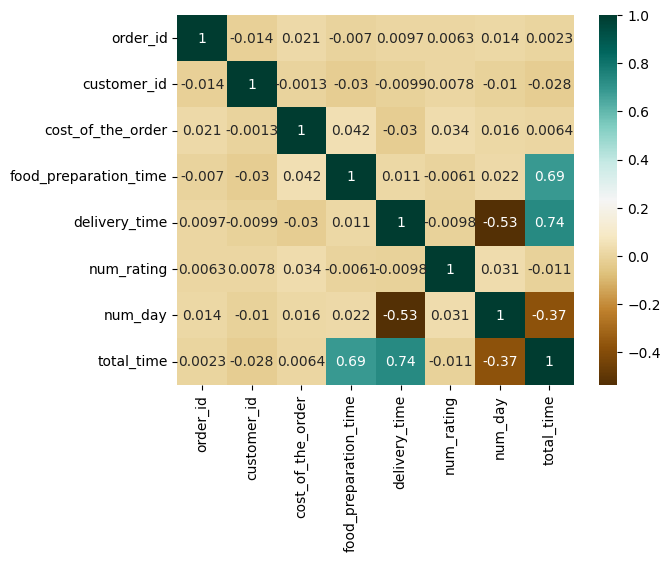

In [390]:
#A correlation heatmap with the correlation numbers included.
sns.heatmap(df.corr(),annot=True,cmap='BrBG');

**Observation 12.1:** The heat map shows that much of the data doesn't strongly correlate. The exceptions involve time: of course the food preparation time and delivery time correlate strongly with the total time taken. The odder note to explore is that the type of day (weekday compared to weekend) correlates with the delivery time (and thus inevitably also with the total time). There doesn't seem to be a strong correlation of anything with ratings, though both cost of the order and type of day are 3% related.

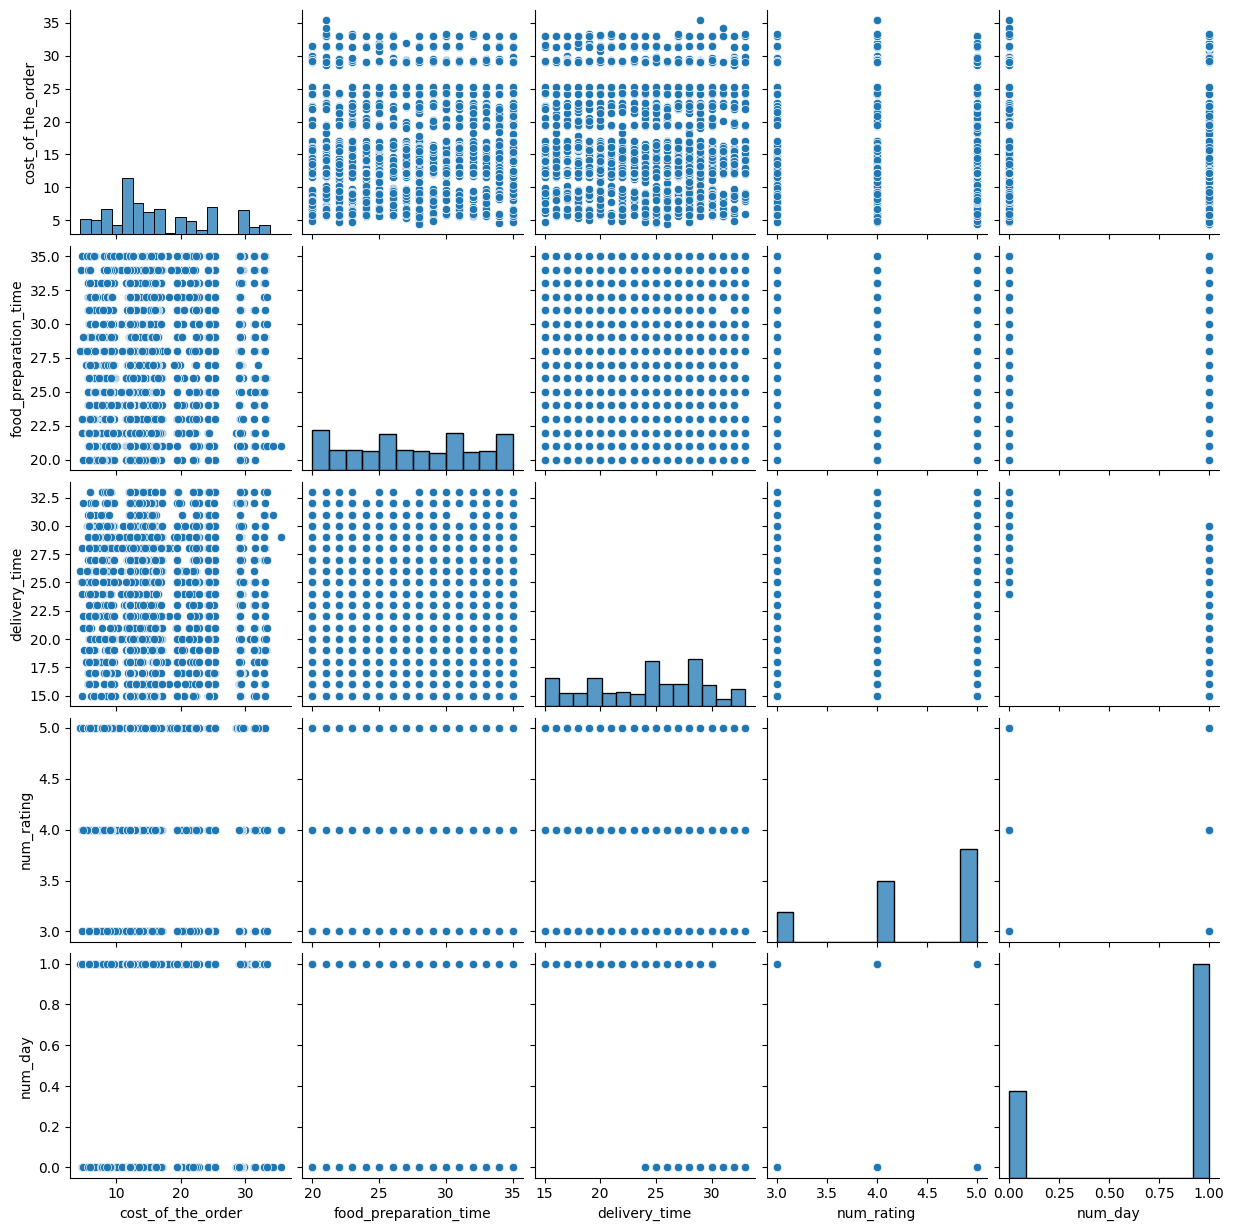

In [391]:
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time','num_rating','num_day']]);

**Observation 12.2:** The pair plots seem to have consistent and regular patterns in most cases, though it is clear that the weekdays serve only half of the customers that the weekends do, and the weekend orders require less delivery time than does the weekday orders.

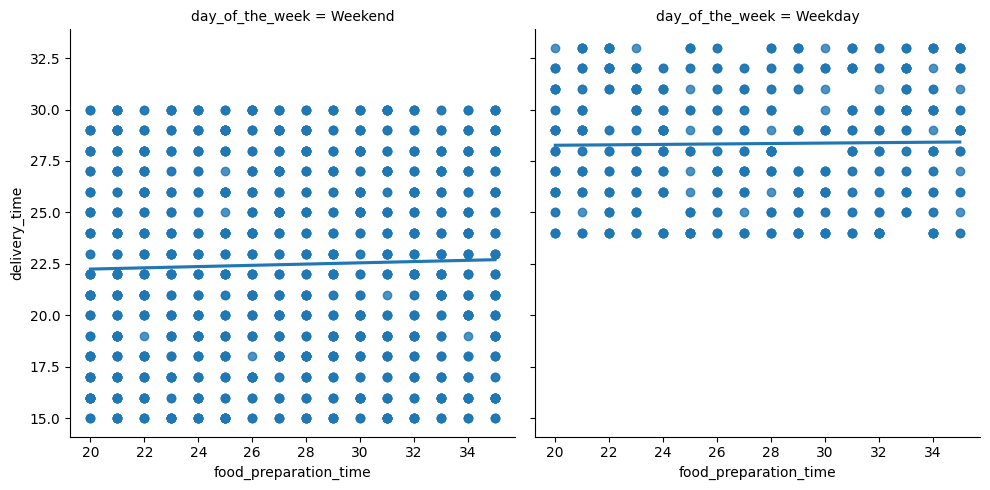

In [392]:
sns.lmplot(data=df, x='food_preparation_time', y='delivery_time',col='day_of_the_week', ci=True);

**Observation 12.3:** The food preparation time is mostly evenly spaced from 22 to 36 minutes, but the delivery time on the weekends ranges from 15 to 30 minutes, while on the weekdays, it starts at 8 minutes later.

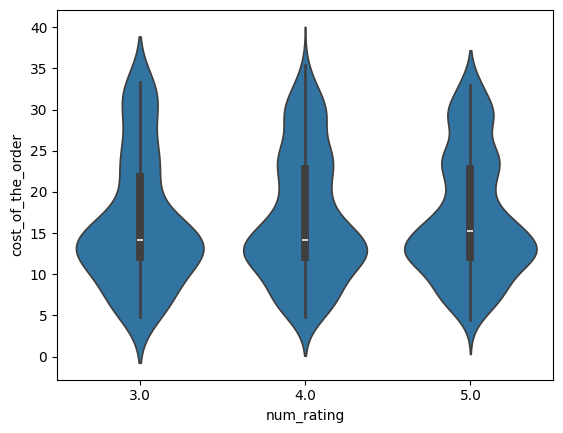

In [393]:
sns.violinplot(data=df, y='cost_of_the_order', x='num_rating');

**Observation 12.4:** The violin plot shows that the cost of the order has very little effect on the ratings.

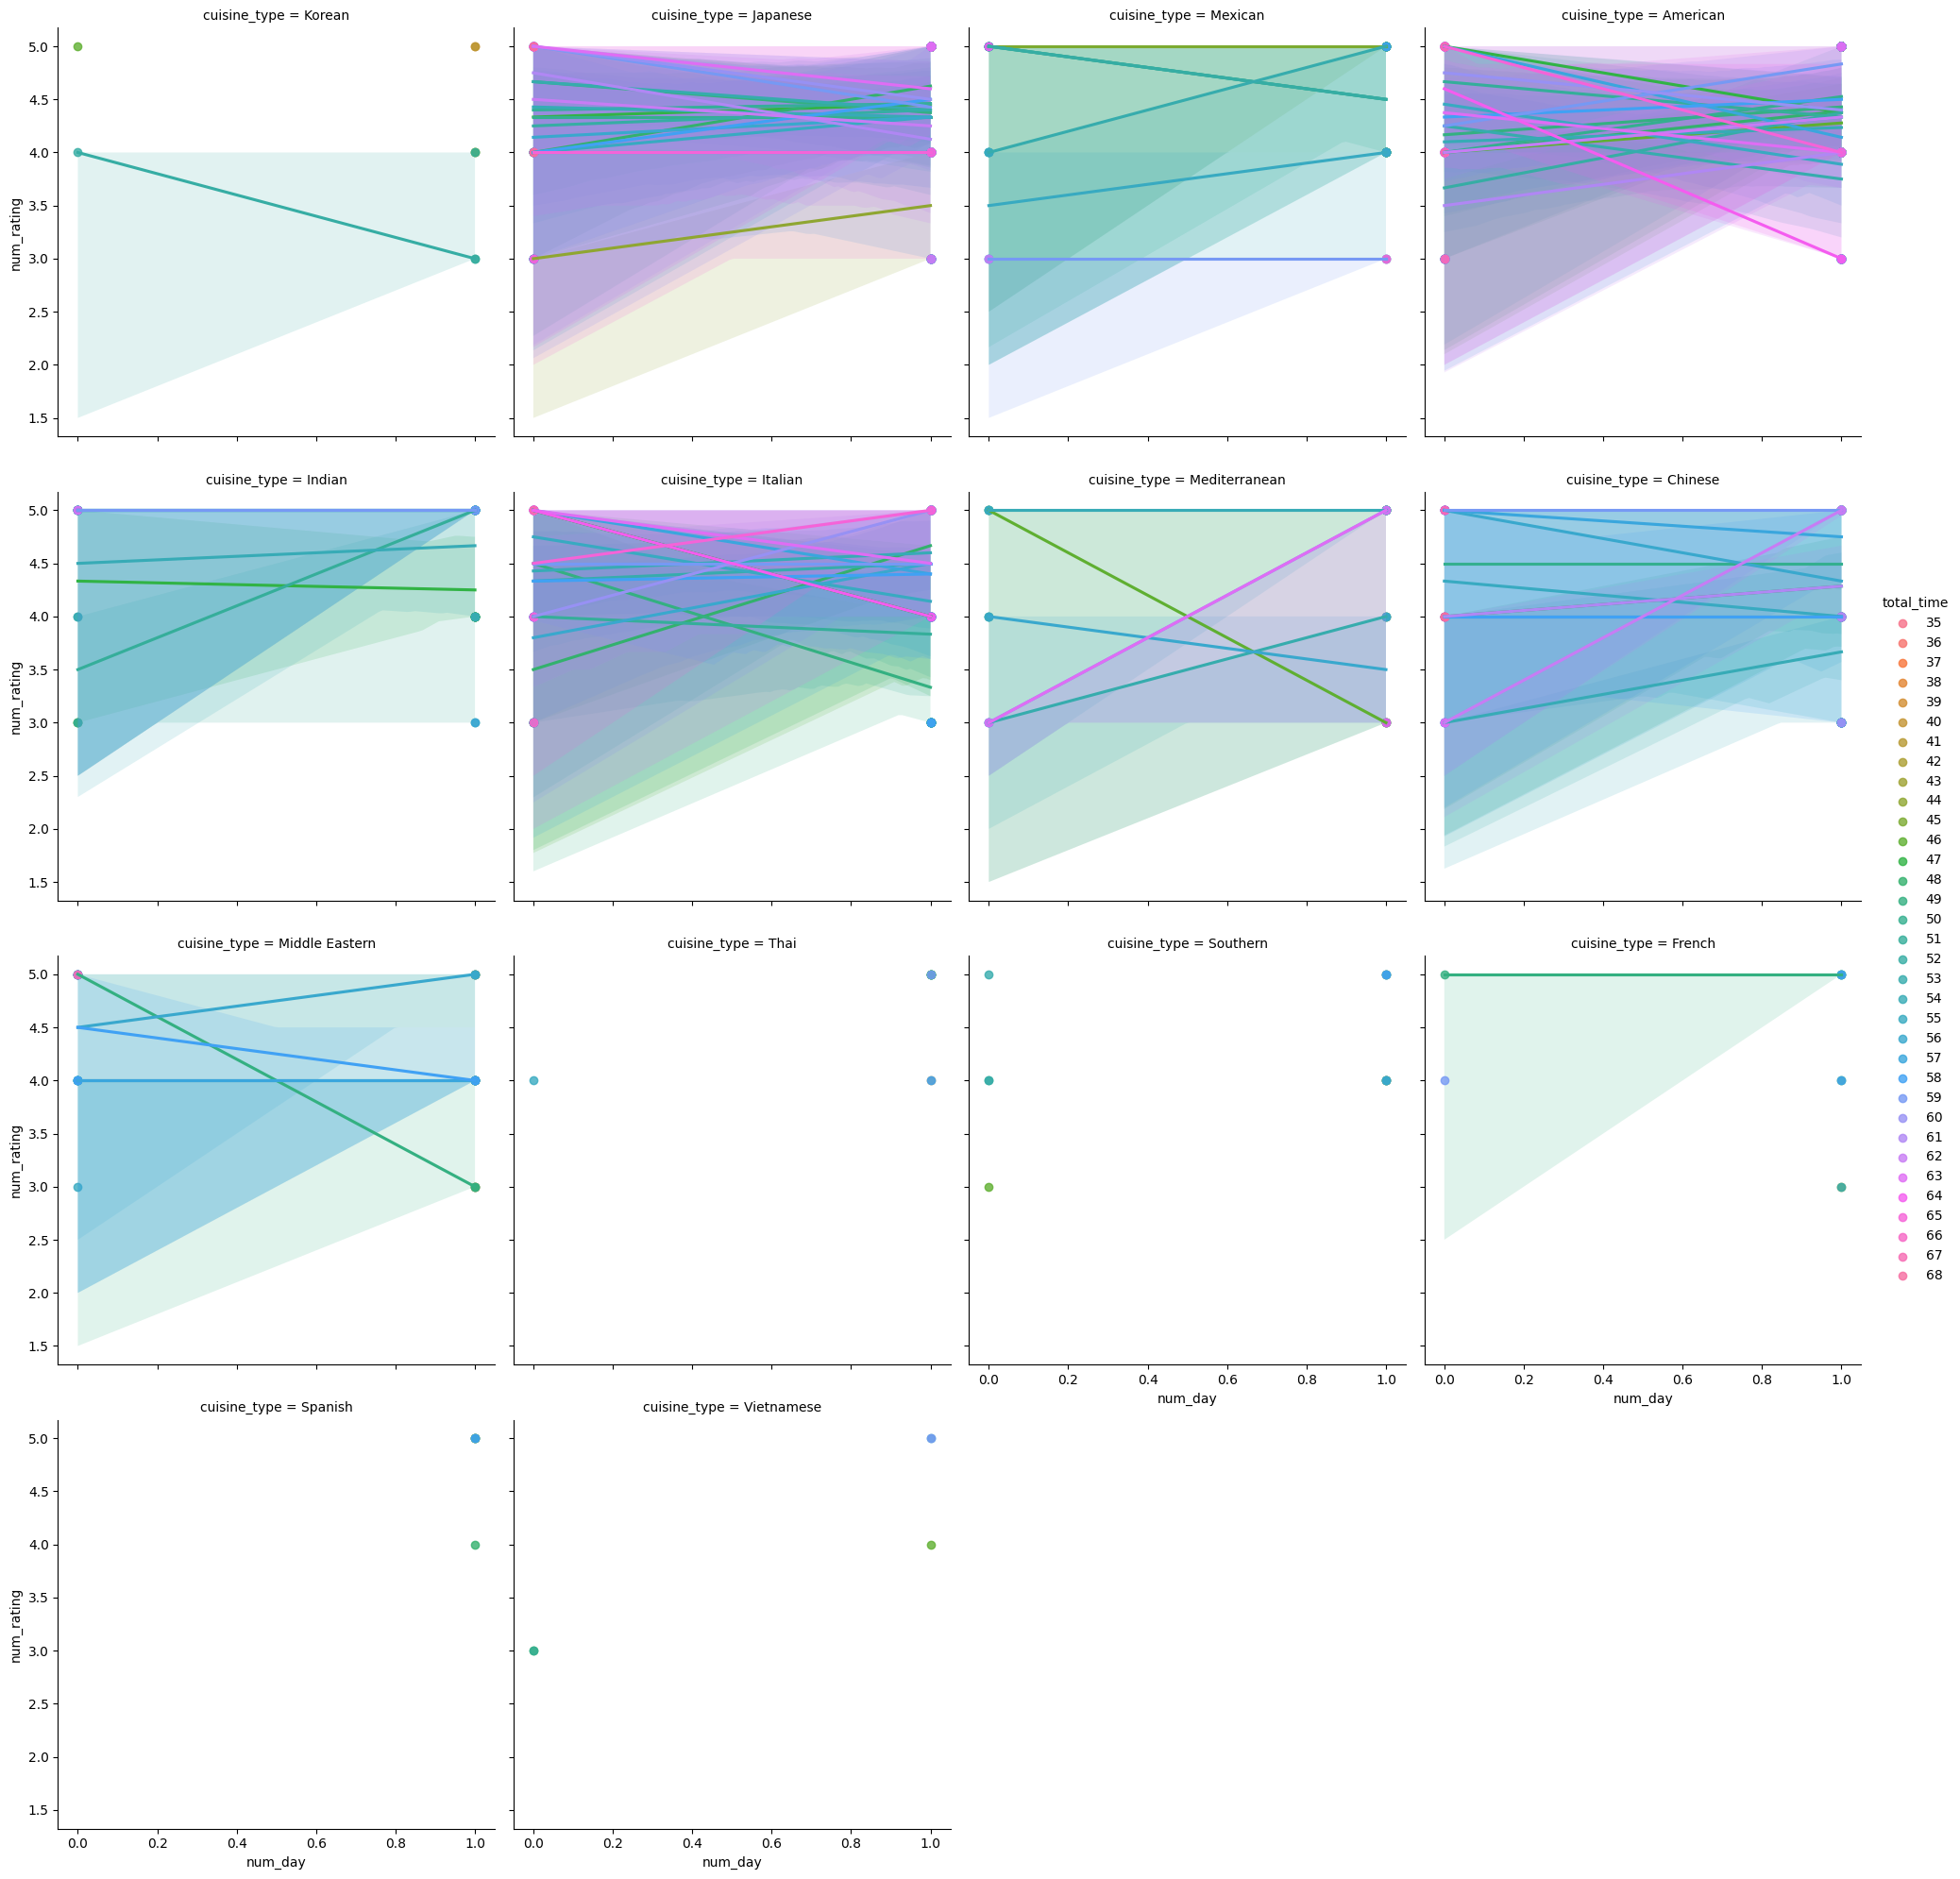

In [394]:
#looking at the diffent cuisines according to their ratings on weekdays and weekends, with an eye to total time for a customer to receive food after order is replaced.
sns.lmplot(data=df, x='num_day', y='num_rating', hue='total_time', col='cuisine_type',col_wrap=4);

**Observation 12.5:** Breaking it down according to cuisine, it is easy to see that some restaurant groups have some shift in their ratings from the weekdays to weekends (left side, right side respectively). It also becomes easier to see that some restaurants do take considerably longer to prepare and deliver orders than others. Graphs with darker purple colors (representing Italian, Japanese, and American) take significantly longer than other cuisine groups, such as Mexican, Indian, and Middle Eastern.

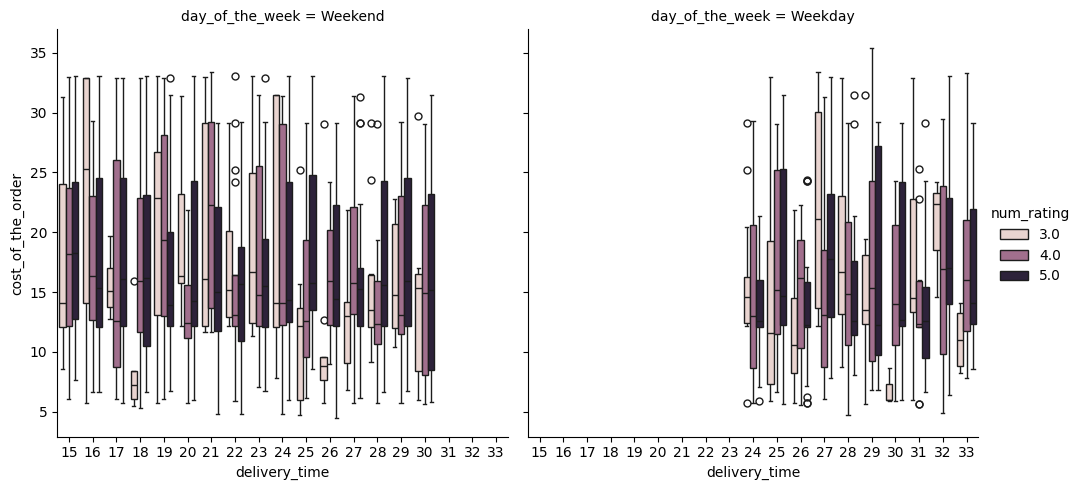

In [395]:
#comparing delivery time, cost of the order, and ratings
sns.catplot(data=df, x='delivery_time', y='cost_of_the_order', hue='num_rating', col='day_of_the_week',kind='box');

**Observation 12.6:** Again, it's clear that ratings are all over the place. Also, it clearly reinforces the difference in delivery time from weekends to weekdays, which, at minimum take nine minutes longer.

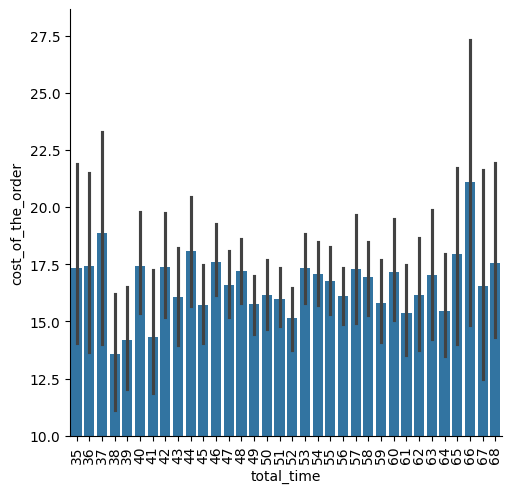

In [396]:
#compare the cost of the order with the total time order takes
sns.catplot(data=df, x='total_time', y='cost_of_the_order', kind='bar')
plt.xticks(rotation=90)
plt.ylim(10,);

**Observation 12.7:** A close up look comparing the overall cost to the total time for an order to be prepared and delivered with very few nuances to appreciate.

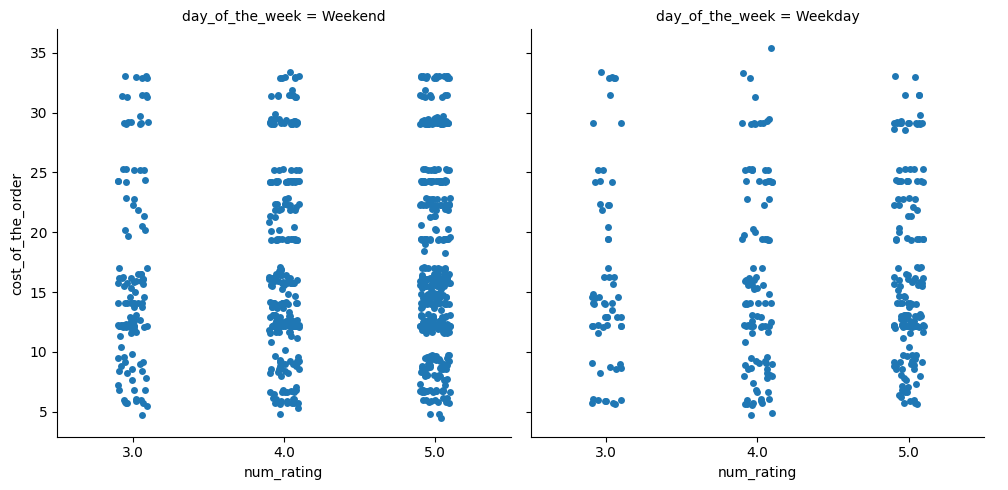

In [397]:
#compare the cost of the order with the rating it received, differiated for weekday compared to weekend
sns.catplot(data=df, x='num_rating', y='cost_of_the_order', col='day_of_the_week', kind='strip',jitter=True);

**Observation 12.8:** Obviously there are fewer orders on the weekdays, but the ratings seem to follow the same striations, regardless of day of the week, or cost of the order.

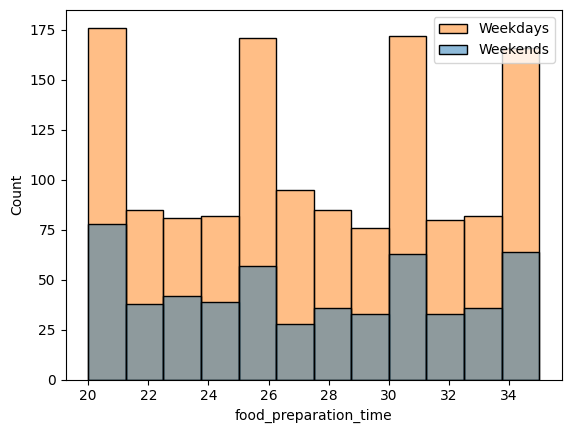

In [398]:
sns.histplot(data=df, x='food_preparation_time', hue='num_day')
plt.legend(labels=['Weekdays','Weekends']);

**Observation 12.9:** There are four main modes in the data involving food preparation, which could refer to standard cooking times for different entrees. Otherwise, the distribution of food preparation times seems consistent on both weekdays and weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [399]:
#Create a group with only restaurant names and ratings
promo_group = df.loc[:,['restaurant_name','order_id','rating']].copy();
print(promo_group)

                            restaurant_name  order_id     rating
0                                   Hangawi   1477147  Not given
1                 Blue Ribbon Sushi Izakaya   1477685  Not given
2                               Cafe Habana   1477070          5
3                 Blue Ribbon Fried Chicken   1477334          3
4                          Dirty Bird to Go   1478249          4
...                                     ...       ...        ...
1893  Chipotle Mexican Grill $1.99 Delivery   1476701          5
1894                              The Smile   1477421          5
1895                      Blue Ribbon Sushi   1477819  Not given
1896                      Jack's Wife Freda   1477513          5
1897                      Blue Ribbon Sushi   1478056  Not given

[1898 rows x 3 columns]


In [400]:
#change 'Not given' str to Nan
promo_group['rating'] = promo_group['rating'].replace(['Not given'],np.nan)
print(promo_group)

                            restaurant_name  order_id rating
0                                   Hangawi   1477147    NaN
1                 Blue Ribbon Sushi Izakaya   1477685    NaN
2                               Cafe Habana   1477070      5
3                 Blue Ribbon Fried Chicken   1477334      3
4                          Dirty Bird to Go   1478249      4
...                                     ...       ...    ...
1893  Chipotle Mexican Grill $1.99 Delivery   1476701      5
1894                              The Smile   1477421      5
1895                      Blue Ribbon Sushi   1477819    NaN
1896                      Jack's Wife Freda   1477513      5
1897                      Blue Ribbon Sushi   1478056    NaN

[1898 rows x 3 columns]


In [401]:
#change the 'rating' column type to a float
promo_group.dropna(subset=['rating']).reset_index(inplace=False)
promo_group['rating']=promo_group['rating'].astype(float)
promo_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  1898 non-null   object 
 1   order_id         1898 non-null   int64  
 2   rating           1162 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.6+ KB


In [402]:
#aggregation method of finding both rating average and number of ratings for each restaurant
#I did 30 ratings just to verify the top five.
selected=promo_group.groupby(promo_group['restaurant_name'])['rating'].agg(['mean','count'])
selected[selected['count']>30].sort_values(by='count',ascending=False)

,mean,count
restaurant_name,,
Shake Shack,4.28,133
The Meatball Shop,4.51,84
Blue Ribbon Sushi,4.22,73
Blue Ribbon Fried Chicken,4.33,64
RedFarm Broadway,4.24,41
Parm,4.13,39
RedFarm Hudson,4.18,34


#### **Observations:** There are only 4 restaurants that qualify for the promotion: The Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [403]:
df['revenue'] = np.where(df.cost_of_the_order > 20,\
                         df.cost_of_the_order * 0.25,\
                         np.where(df.cost_of_the_order > 5,\
                                  df.cost_of_the_order * 0.15,\
                                  0))
df.head()
print ('The company, FoodHub, made ',round(df['revenue'].sum(),2),'dollars net revenue across all orders.')

The company, FoodHub, made  6166.3 dollars net revenue across all orders.


In [404]:
#the following calculations broke down the above math:
#top spenders: (average spent, then number of spenders)
    #df[df['cost_of_the_order']>20].mean() #26.59 average cost of order
    #df[df['cost_of_the_order']>20] #555 spenders
#mid spenders: (average spent, then number of spenders)
    #df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<20)] #1334 spenders
    #df[(df['cost_of_the_order']>4.99) & (df['cost_of_the_order']<20.01)].mean() #12.38 average cost of order
#low spenders: (average spent, then number of spenders)
    #df[df['cost_of_the_order']<5].shape[0]  #0 spenders
    #df[df['cost_of_the_order']<5].mean()   #4.75 average cost of order
#total revenue in orders
df['cost_of_the_order'].sum() #31314.82 total revenue in orders
#since revenue is rounded: math below to verify above totals

31314.82

In [405]:
#compare to above results:
net_dollars=(26.59*555)+(12.38*1334)+(9*4.75)
print(net_dollars)  #31315.12 (a difference of 30 cents; rounding error?)

31315.120000000003


#### Observations: The company, FoodHub, made 6166.3 dollars net revenue across all orders. For 1898 orders, the average is $3.25 net revenue per order.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [406]:
#completed in question 12- new column of preparation and delivery times added
#df['total_time']=df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,num_rating,num_day,total_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,1,45,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,1,48,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.00,0,51,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.00,1,40,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.00,0,49,1.74


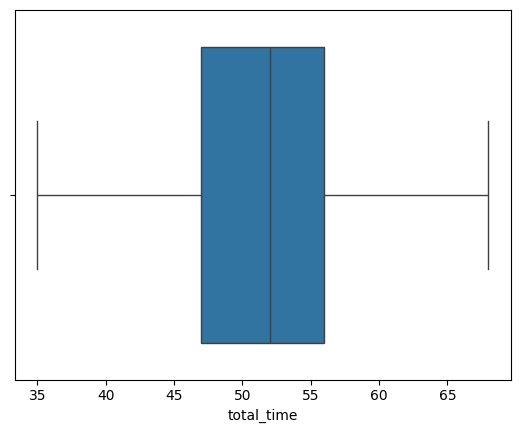

In [407]:
sns.boxplot(data=df, x ='total_time');

In [408]:
#number of orders over $20 divided by total number of orders to get percentage
round((df[df['total_time']>60].shape[0]/df.shape[0])*100,2)

10.54

#### Observations: 11% of the orders are delivered more than 1 hour after order placement.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

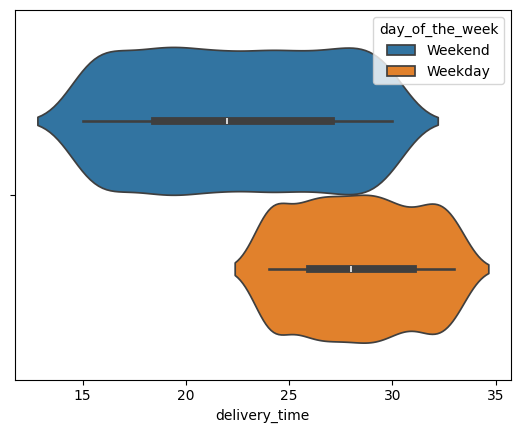

In [409]:
sns.violinplot(data=df,x='delivery_time', hue='day_of_the_week');

In [410]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations: As observed before, weekday delivery time exceeds weekend delivery times.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  **Customers:**
There are 1200 unique customers, with almost 800 placing only one order. Why do only 1 of 3 people place second orders, and 1 of 3 of those place third orders?

* **Restaurants**
Of the 178 restaurants, 18 restaurants account for the top 60% of orders; the remaining 160 restaurants vie for the remaining 750 orders. Also, the top six cuisines are clear favorites and account for 90% of the orders.

* **Delivery**
Weekdays serve half of the customers that the weekends do, but delivery takes 8 minutes longer.

* **Ratings**
It would seem that ratings are significant, but notice three things:
1)	About a third of customers do not rate their orders,
2)	No one gave ratings below a 3 on a 5 point scale, and
3)	Ratings are consistent regardless of days of the week, delivery times, or cost of the order.

* **Revenue**
The company, FoodHub, made 6166.3 dollars net revenue across all orders. Considering that we are talking about 1898 orders, the average is $3.25 net revenue per order. Moving 10% of customers up a level could increase profits by 4% over the time period.


### Recommendations:

* **Customers:**What are ways to encourage repeat business from our customers?

* **Delivery:** Can delivery be sped up on weekdays? Is the difficulty a function of traffic, or manpower?

* **Restaurants:** Would it be financially beneficial to narrow the number of restaurants served? (Serving fewer locations may increase available delivery drivers.)

* **Ratings:** Not a focus at this time.

* **Revenue:** What are ways to drive or add on incremental revenue from customers?


---